In [6]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [7]:

####################################################################################################
####################################################################################################

#input_dir  = "../../pax_merge/merged/apr30/"
#input_file = 'merged_all_200000.pkl'
#input_path = input_dir + input_file
#dir_in     = '../../pax_merge/merged/apr30/waveforms_s2waveforms_test_v2/new'

#input_dir  = '/home/dbarge/scratch/simulations/wimp/merged/may07/'        # 6.5.1
input_dir  = '/project/lgrandi/dbarge/simulation/wimp/pax_v6.8.3/merged/' # 6.8.3
input_file = 'merged_all_200000.pkl'
input_path = input_dir + input_file


####################################################################################################
####################################################################################################

cols = ['intr_count', 'x', 'y', 'intr_x', 'intr_y', 'intr_x_nn', 'intr_y_nn']

df = pd.read_pickle(input_path)

df = df[cols]

print(len(df.index))

df = df[df['intr_count'] == 1].reset_index(drop=True)

print(len(df.index))

df = df[100000:][:]

nEvents = len(df.index)

print(len(df.index))
display(df[0:5][:])


####################################################################################################
####################################################################################################

x_true = df[:]['x'].as_matrix()
y_true = df[:]['y'].as_matrix()

x_tpf  = df[:]['intr_x'].as_matrix()
y_tpf  = df[:]['intr_y'].as_matrix()

x_nn   = df[:]['intr_x_nn'].as_matrix()
y_nn   = df[:]['intr_y_nn'].as_matrix()

dx_tpf = x_true - x_tpf
dy_tpf = y_true - y_tpf

dx_nn  = x_true - x_nn
dy_nn  = y_true - y_nn


####################################################################################################
# dR
####################################################################################################

dr_tpf = np.sqrt( np.square(dx_tpf) + np.square(dy_tpf) )
dr_nn  = np.sqrt( np.square(dx_nn)  + np.square(dy_nn)  )

dr_std_tpf = np.std(dr_tpf)
dr_std_nn  = np.std(dr_nn)

dr_mean_tpf = np.mean(dr_tpf)
dr_mean_nn  = np.mean(dr_nn)

dr_nbins = 7*10*2
dr_range = [-3, 3]
dr_max   = 7

dr_label_tpf = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'TPF: $\Delta$D ', dr_std_tpf, dr_mean_tpf)
dr_label_nn  = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'NN:  $\Delta$D ', dr_std_nn , dr_mean_nn )


####################################################################################################
# Overflow & Underflow
####################################################################################################

dr_tpf = np.clip(dr_tpf, 0, dr_max)
dr_nn  = np.clip(dr_nn , 0, dr_max)


200000
127826
27826


,intr_count,x,y,intr_x,intr_y,intr_x_nn,intr_y_nn
100000,1,7.332030,-30.591311,5.640515,-25.802357,5.963322,-25.627516
100001,1,-13.701462,12.687316,-11.881086,10.920998,-12.208843,10.564307
100002,1,7.042967,4.772081,6.120559,4.440406,5.657052,3.909451
100003,1,9.732044,31.983084,9.720888,28.202577,10.374315,27.733961
100004,1,17.004165,32.997236,14.761349,28.682621,15.570843,28.051881


/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/e

(27826,)


(0, 480.0)

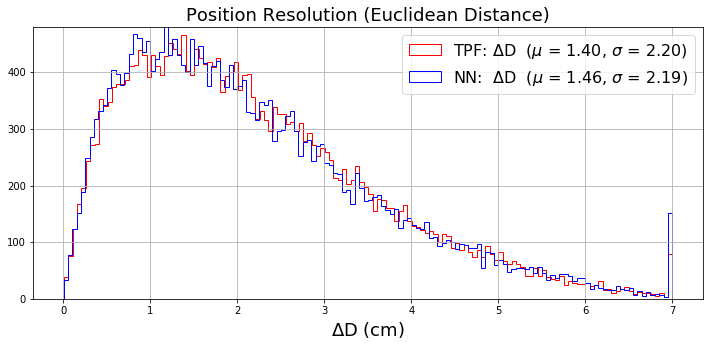

In [11]:

####################################################################################################
####################################################################################################

print(dr_tpf.shape)

w, h = 12, 5
f = plt.figure(figsize=(w, h))
plt.title('Position Resolution (Euclidean Distance)', fontsize=18)

# TPF
plt.hist(dr_tpf, bins=dr_nbins, histtype='step', color='r', label=dr_label_tpf)
plt.ylim([0, 400])
plt.xlabel('$\Delta$R', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

# NN
plt.hist(dr_nn, bins=dr_nbins, histtype='step', color='b', label=dr_label_nn)
plt.ylim([0, 400])
plt.xlabel('$\Delta$D (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.ylim([0, 1.2*plt.gca().get_ylim()[1]])

#f.savefig('plots/resolution_reference.png')

